**PART 2**

Using Artificial neural network and convolutional neural network Identify the different classes of MNIST Fashion dataset.

In [54]:
# improting libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [55]:
# Importing the dataset
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')

In [56]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
#since training and test data set has a label column, lets drop it
y_train = df_train['label']
y_test = df_test['label']
df_train.drop(['label'],axis=1, inplace=True)
df_test.drop(['label'],axis=1, inplace=True)

In [59]:
#defining the test and training dataframes
#training set
x_train = df_train.to_numpy()
y_train = y_train.to_numpy()

#testing set
x_test = df_test.to_numpy()
y_test = y_test.to_numpy()

In [60]:
x_train = x_train.reshape(x_train.shape[0], 28, 28).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0], 28, 28).astype('float32')/255

Data Visualization

In [61]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [62]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

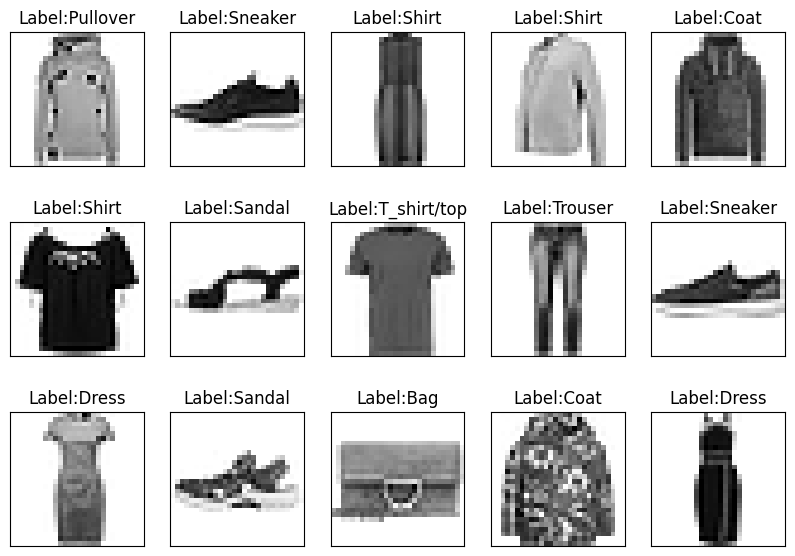

In [63]:
train_preview = x_train[85:100].reshape(15,28,28)
plt.figure(figsize=(10,7))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_preview[i],  cmap=plt.cm.binary)
  plt.title('Label:{}'.format(class_names[y_train[i+85]]))

In [64]:
#defining the model structure

model = Sequential()
model.add(Flatten(input_shape=((28,28))))
model.add(Dense(100,activation = "relu"))
model.add(Dense(10,activation="softmax"))

c:\Users\pasin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
model.compile(optimizer = "adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [66]:
history = model.fit(x_train, y_train, epochs = 30, validation_split=0.2, verbose=1)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7672 - loss: 0.6784 - val_accuracy: 0.8412 - val_loss: 0.4492
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8538 - loss: 0.4068 - val_accuracy: 0.8637 - val_loss: 0.3849
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8674 - loss: 0.3649 - val_accuracy: 0.8503 - val_loss: 0.4082
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8818 - loss: 0.3315 - val_accuracy: 0.8710 - val_loss: 0.3602
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8820 - loss: 0.3185 - val_accuracy: 0.8690 - val_loss: 0.3673
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8869 - loss: 0.3012 - val_accuracy: 0.8819 - val_loss: 0.3421
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8948 - loss: 0.2895 - val_accuracy: 0.8819 - val_loss: 0.3266
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9016 - loss: 0.2685

Model Evaluation

Initially, assess the fluctuations in accuracy and loss.Let us establish a function for that purpose.

In [67]:
def eval_accuracy_loss(history):
    # Get parameters for the testing set
    accuracy_testing = history.history['accuracy']
    loss_testing = history.history['loss']
    number_of_epochs = range(len(accuracy_testing))

    # Get parameters for the validation set
    accuracy_validation = history.history['val_accuracy']
    loss_validation = history.history['val_loss']

    # Plotting the accuracy
    plt.figure(figsize=(10, 7))
    plt.plot(number_of_epochs, accuracy_testing, 'b--', label='Training Accuracy')
    plt.plot(number_of_epochs, accuracy_validation, 'r-', label='Validation Accuracy')
    plt.title('Accuracy Variation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting the loss
    plt.figure(figsize=(10, 7))
    plt.plot(number_of_epochs, loss_testing, 'b--', label='Training Loss')
    plt.plot(number_of_epochs, loss_validation, 'r-', label='Validation Loss')
    plt.title('Loss Variation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

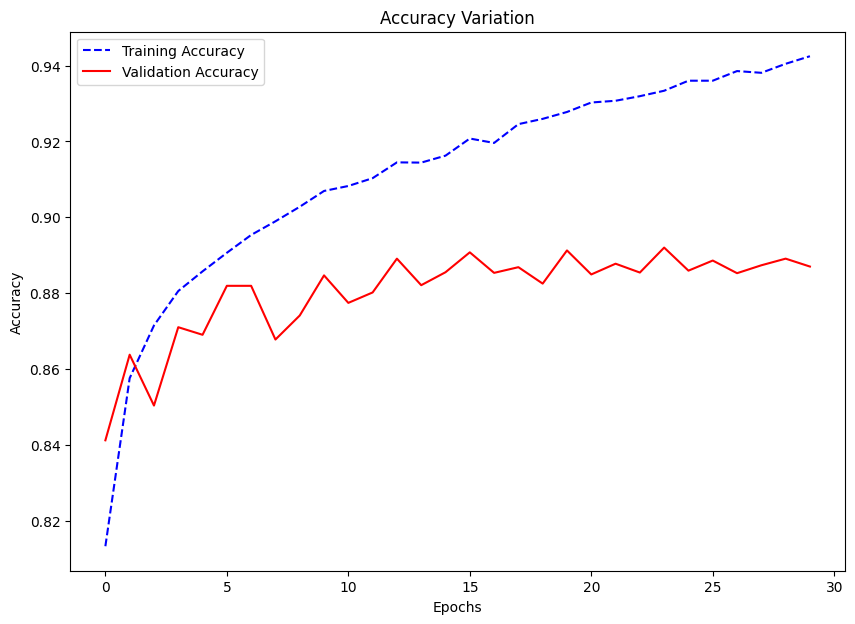

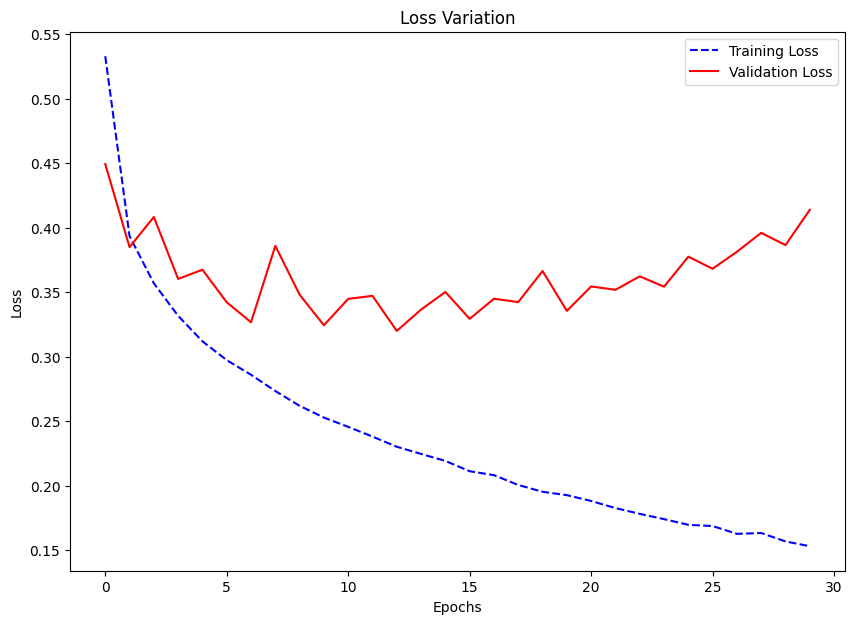

In [68]:
eval_accuracy_loss(history)

In [70]:
#test the model with test data
pred = np.argmax(model.predict(x_test[:20]), axis=1)
print(pred)
print(y_test[:20])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[0 1 2 2 4 6 8 6 5 0 3 2 6 6 8 5 6 3 6 4]
[0 1 2 2 3 2 8 6 5 0 3 4 4 6 8 5 6 3 6 4]


In [99]:
def test_model(model):
    pred = model.predict(x_test[120:135])

    pred = np.argmax(pred, axis=1)

    plt.figure(figsize=(15, 12))
    for i in range(15):
        plt.subplot(3, 5, i + 1)
        plt.imshow(x_test[i+120], cmap="gray")
        plt.title(class_names[y_test[i+120]] + " | " + class_names[pred[i]])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


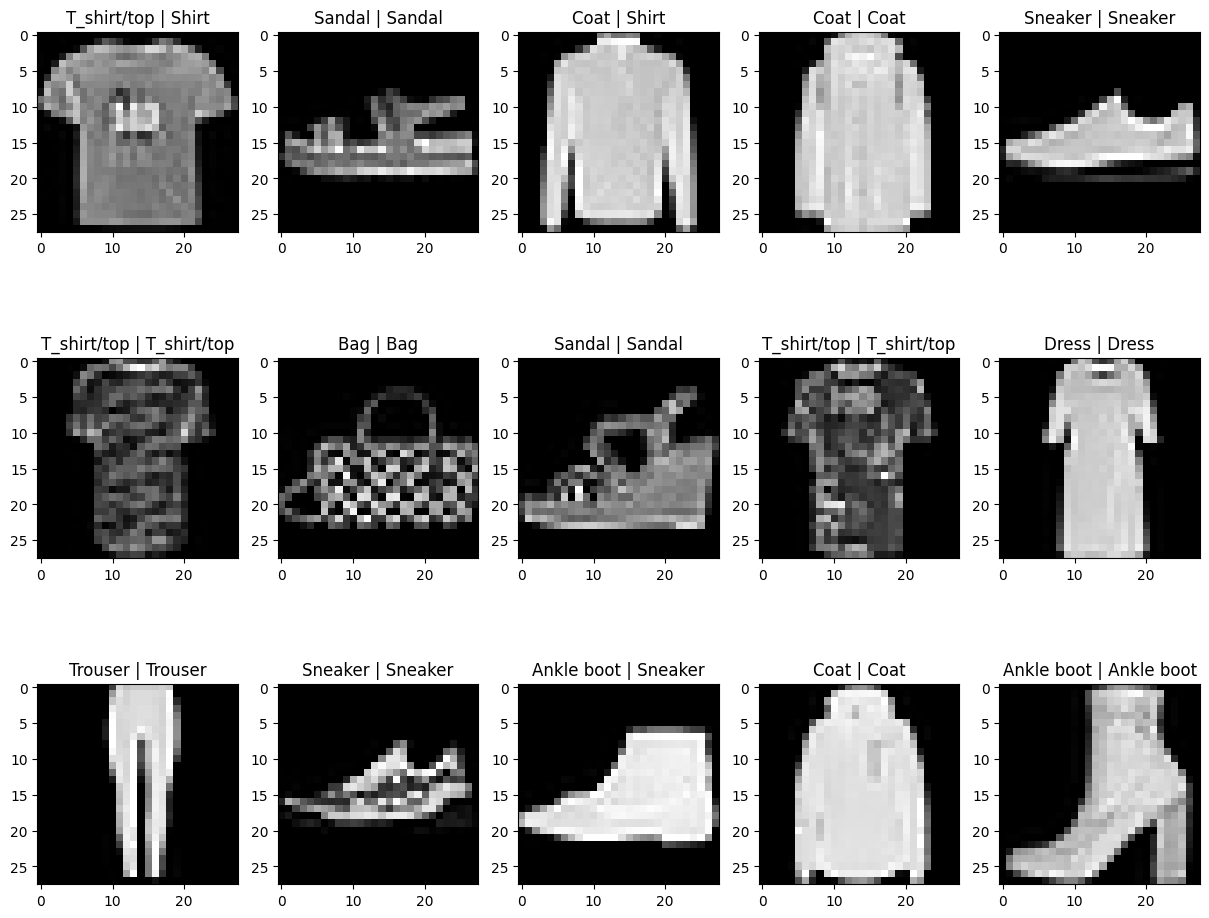

In [100]:
test_model(model)

b. Train a Convolutional neural network(CNN) for the above data set considering data points as images.

In [102]:
# Define an empty stack for building the network layer by layer
model = tf.keras.models.Sequential()

# Add a 2D convolutional layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(28, 28, 1)))

# Add a max pooling layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Add a dropout layer
model.add(tf.keras.layers.Dropout(rate=0.25))

# Flatten the output
model.add(tf.keras.layers.Flatten())

# Add a dense (fully connected) layer with ReLU activation
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Add the output layer with softmax activation
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Compile the model with specified loss, optimizer, and metrics
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# Display a summary of the model architecture
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [103]:
# Train CNN model
history_cnn = model.fit(x_train, y_train,batch_size=256,epochs=10, validation_split=0.2,verbose=1) 

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - accuracy: 0.7295 - loss: 0.7856 - val_accuracy: 0.8591 - val_loss: 0.4063
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.8649 - loss: 0.3777 - val_accuracy: 0.8850 - val_loss: 0.3315
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.8876 - loss: 0.3139 - val_accuracy: 0.8957 - val_loss: 0.3040
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.8953 - loss: 0.2918 - val_accuracy: 0.8952 - val_loss: 0.2959
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.9045 - loss: 0.2685 - val_accuracy: 0.8975 - val_loss: 0.2839
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.9065 - loss: 0.2524 - val_accuracy: 0.9035 - val_loss: 0.2695
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.9129 - loss: 0.2409 - val_accuracy: 0.9041 - val_loss: 0.2644
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.9168 - loss: 0.2330 - 

Model evaluation

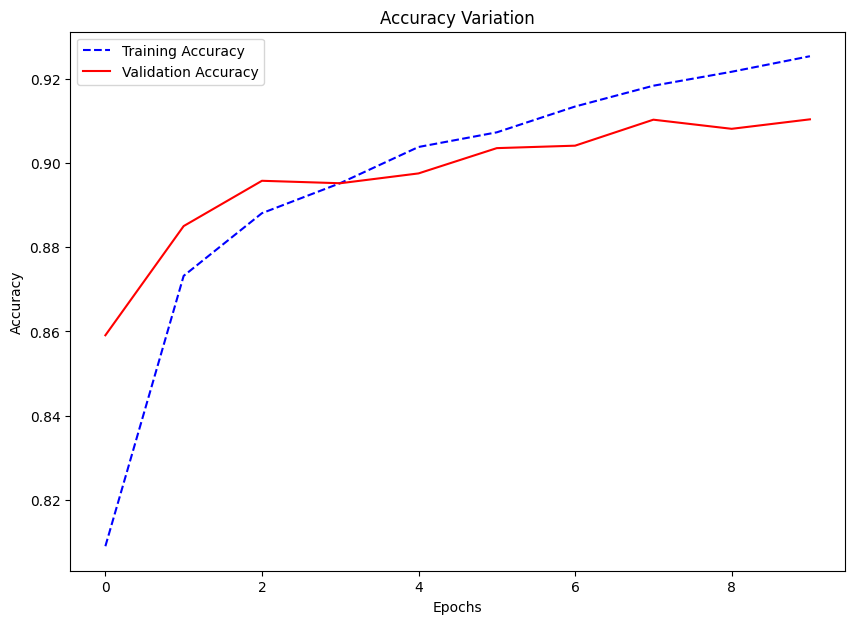

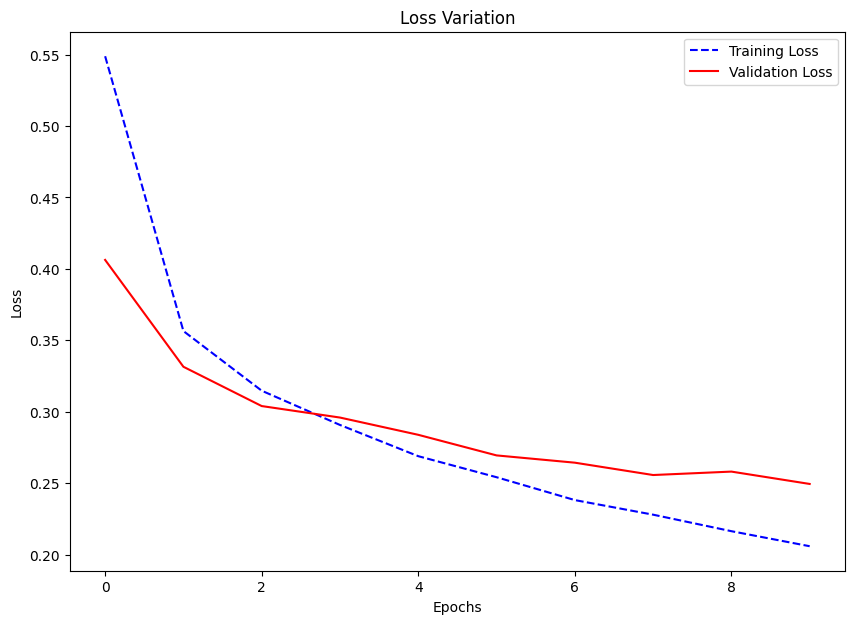

In [104]:
eval_accuracy_loss(history_cnn)

In [105]:
#test the model with test data
pred = np.argmax(model.predict(x_test[:20]), axis=1)
print(pred)
print(y_test[:20])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[0 1 2 2 3 6 8 6 5 0 3 2 4 6 8 5 6 3 6 4]
[0 1 2 2 3 2 8 6 5 0 3 4 4 6 8 5 6 3 6 4]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


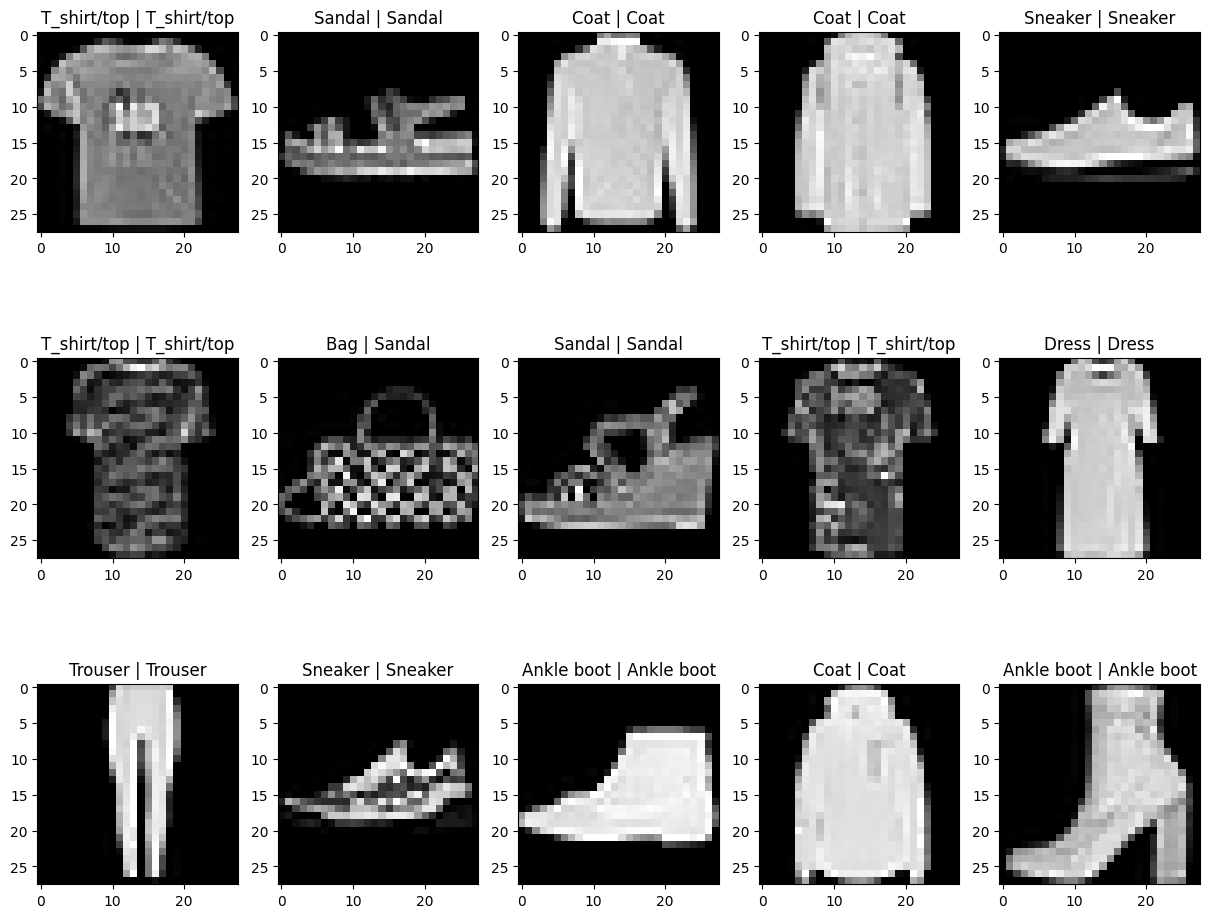

In [106]:
test_model(model)

c. Identify the difference between above 2 models

Upon analysing the accuracy and loss curves of the ANN model, it becomes evident that the model starts to overfit the data during the training process after completing 3 epochs. This may be observed by analysing the validation and training curves after epoch=3, where it becomes evident that the disparity between them is progressively growing.

However, the CNN model does not follow this pattern. Since the accuracy and loss curves of both the training and validation datasets are consistently aligned and the discrepancy is not growing, it can be concluded that... Hence, the CNN model exhibits significantly higher accuracy in comparison to the ANN model.


f. Discuss having more or less nodes in a single layer and having a deep or a shallow network against the computational complexity.

Artificial Neural Networks (ANNs) are structured with an input layer, one or more hidden layers, and an output layer, each comprising neurons with associated weights and thresholds. Neurons activate when their output exceeds the threshold, transmitting data to subsequent layers. Adding layers increases neuron count and model complexity, potentially causing overfitting as some neurons fail to meet activation thresholds, leading to their removal. Dropout layers after hidden layers mitigate overfitting. ANNs may not suit large datasets due to explicit data point image detailing, demanding significant processing time. Contrastingly, Convolutional Neural Networks (CNNs) automatically extract image features, making them ideal for larger datasets. ANNs, favoring 1-dimensional vectors, exponentially increase parameters during training, raising memory and time complexities. Given CNNs' minimal human intervention and efficiency, they excel across various domains.

g. Discuss about the way you defined the optimum neural network architecture for the above problem.

An optimal strategy is to employ an equal number of nodes in each concealed layer.
 Nevertheless, it is crucial to take into account the quantity of layers and nodes, as an excessive number of nodes can result in overfitting (when the model becomes excessively tailored to the training data), while a reduced number of nodes can lead to underfitting (when the model is too simplistic to capture patterns). Networks with a greater number of hidden layers (more than 2-3) can result in inaccurate models because to overfitting and a significant increase in computational complexity.